In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_path319 = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris319.pkl'
file_path320 = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris320.pkl'
file_path321 = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris321.pkl'
file_path332 = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris332.pkl'

df319 = pd.read_pickle(file_path319)
df320 = pd.read_pickle(file_path320)
df321 = pd.read_pickle(file_path321)
df332 = pd.read_pickle(file_path332)

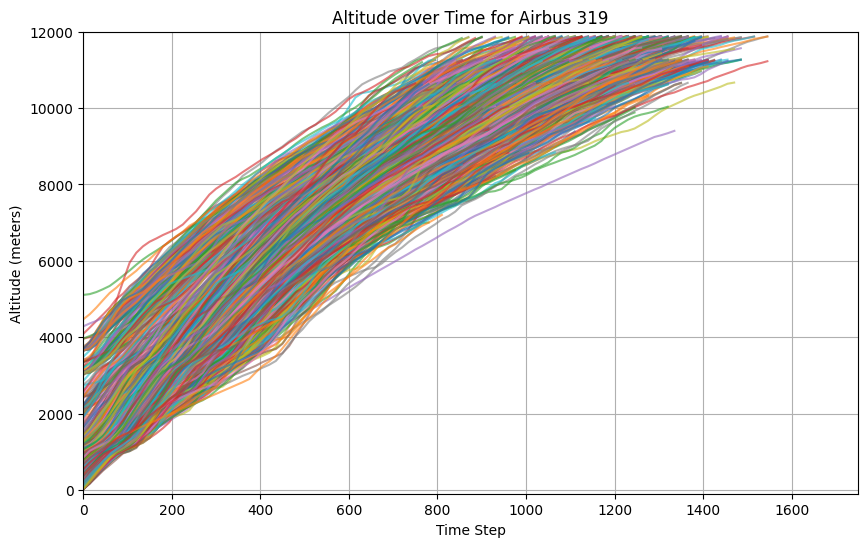

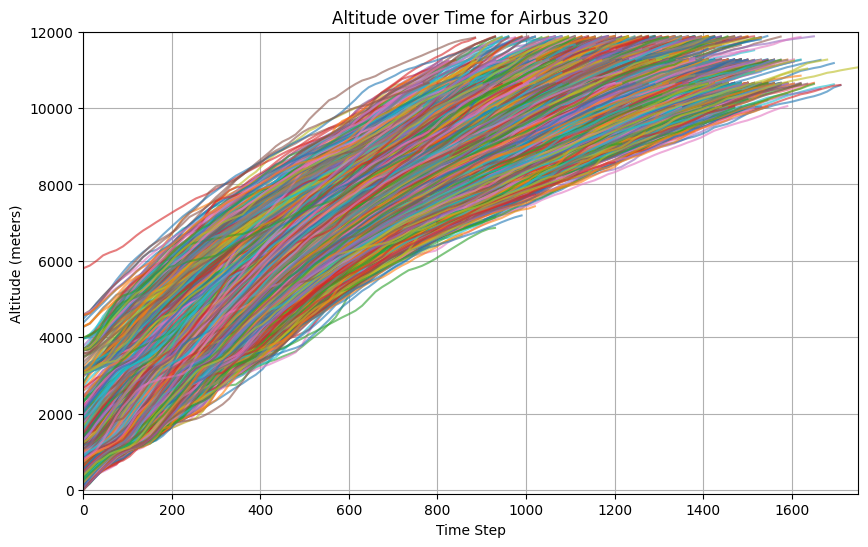

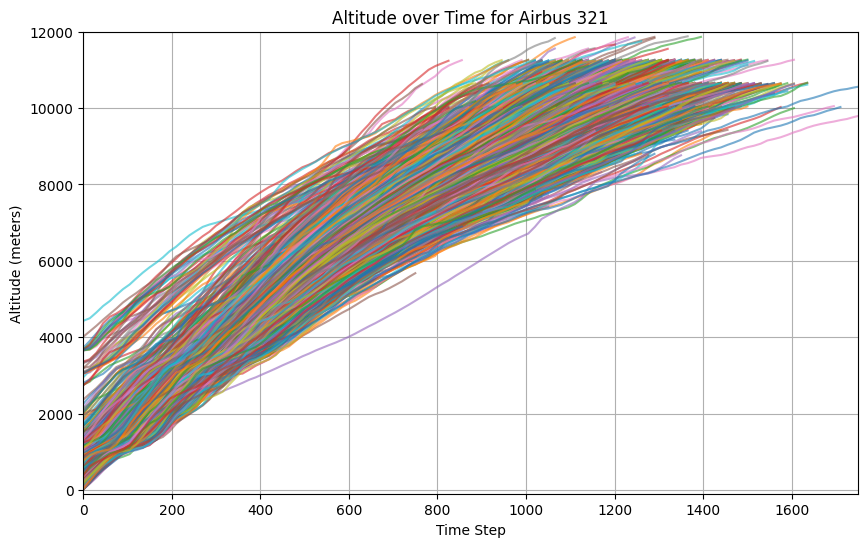

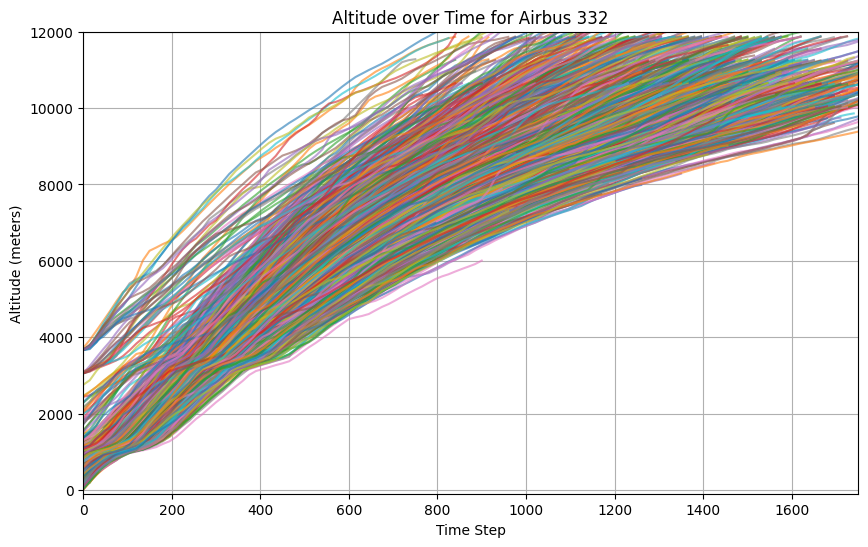

In [7]:
# Function to plot altitude over time
def plot_altitude(df, aircraft_model, xlims, ylims):
    plt.figure(figsize=(10, 6))
    for segment, group in df.groupby('segment'):
        plt.plot(group['timestep'], group['baroaltitude'], label=f'Segment {segment}', alpha=0.6)
    plt.title(f'Altitude over Time for {aircraft_model}')
    plt.xlabel('Time Step')
    plt.ylabel('Altitude (meters)')
    plt.grid(True)
    plt.xlim(xlims)
    plt.ylim(ylims)
    plt.show()

# Define x and y limits
x_limits = (0, 1750)
y_limits = (-100, 12000)

# Plot for each aircraft
plot_altitude(df319, 'Airbus 319', x_limits, y_limits)
plot_altitude(df320, 'Airbus 320', x_limits, y_limits)
plot_altitude(df321, 'Airbus 321', x_limits, y_limits)
plot_altitude(df332, 'Airbus 332', x_limits, y_limits)

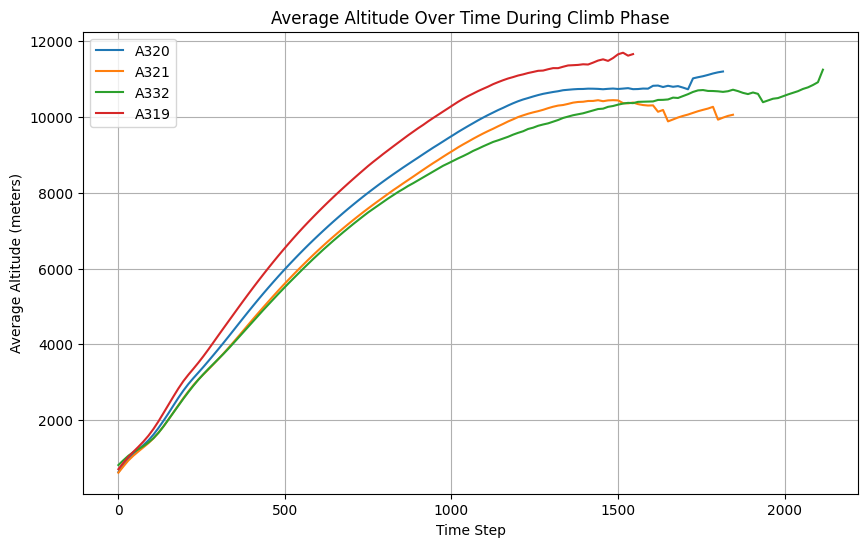

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Path
base_path = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights'

# Filenames of the files
filenames = ['paris320.pkl', 'paris321.pkl', 'paris332.pkl', 'paris319.pkl']
aircraft_data = {}
airplane_models = ['A320', 'A321', 'A332', 'A319']

# Load data
for file in filenames:
    path = f"{base_path}\\{file}"
    aircraft_data[file] = pd.read_pickle(path)

# Prepare the plot
plt.figure(figsize=(10, 6))

# Process and plot data for each aircraft
for file, model in zip(filenames, airplane_models):
    df = aircraft_data[file]
    average_altitude = df.groupby('timestep')['baroaltitude'].mean()    # Calculate average barometric altitude over time
    
    # Plotting
    plt.plot(average_altitude, label=model.replace('.pkl', ''))

plt.title('Average Altitude Over Time During Climb Phase')
plt.xlabel('Time Step')
plt.ylabel('Average Altitude (meters)')
plt.legend()
plt.grid(True)
plt.show()
